# NLP with Naive Bayes
# NEWS BLOGS

In [3]:
# istalling wordcloud liberary
!pip install wordcloud

In [19]:
# importing necessary luberaries
# for data manupulation
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
# setting parameters for graph
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline

# to ignore the future warnings
import warnings
warnings.filterwarnings('ignore')

# for model and datapreprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/NLP%20and%20Naive%20Bayes/blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [12]:
# to display the whole text
pd.set_option('display.max_colwidth', None)

In [14]:
# getting the first document
df['Data'][0]

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,

In [ ]:
# this is the first blog in the corpus

In [18]:
# unique values present in the target column
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [17]:
# number of unique values present in the target column
df['Labels'].nunique()

20

In [22]:
# applying label encodder on the target column
le = LabelEncoder()
df['encoded_label)'] = le.fit_transform(df['Labels'])
df.head(1)

Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,\n#|> #has few religously motivated murders, and few murders of *any*\n#|> #kind, says very little about whether inter-religion murders elsewhere\n#|> #are religiously motivated.\n#|> \n#|> No, but it allows one to conclude that there is nothing inherent\n#|> in all religion (or for that matter, in catholicism and protestantism)\n#|> that motivates one to kill.\n#\n#"Motivates" or "allows?"    The Christian Bible says that one may kill\n#under certain circumstances.   In fact, it instructs one to kill under\n#certain circumstances.     \n\nI'd say the majority of people have a moral system that instructs them\nto kill under certain circumstances.  I do get your distinction between\nmotivate and allow, and I do agree that if a flavour of theism 'allows'\natoricities, then that's an indictment of that theism.  But it rather\ndepends on what the 'certain circumstances' are.  When you talk about\nChristianity, or Islam, then at least your claims can be understood.\nIt's when people go to a general statement about theism that it falls\napart.  One could believe in a God which instructs one to be utterly\nharmless.\n#\n#|> For my part, I conclude that something\n#|> else is required.  I also happen to believe that that something\n#|> else will work no less well without religion - any easy Them/Us will\n#|> do.\n#\n#And what does religion supply, if not an easy Them/Us?\n\nNot necessarily.  "Love thy neighbour" does not supply a them/us - it\ndemolishes it.  And my definition of religion is broader than my\ndefinition of theism, as I have explained.\n#\n#|> #By insisting that even the murder of four labourers, chosen because\n#|> #they were catholics, and who had nothing to do with the IRA, by \n#|> #Protestant extremists, is *not* religously motivated, I think what \n#|> #you are saying is that you simply will not accept *any* murder as \n#|> #being religiously motivated.\n#|> \n#|> No.  What about that guy who cut off someone's head because he believed \n#|> he was the devil incarnate?  That was religously motivated.\n#\n#What about the Protestant extremists who killed four Catholic \n#labourers?     That *wasn't* religiously motivated?\n\nNot in my opinion.  If they were doing it because of some obscure\npoint of theology, then yes.  But since all protestants don't do this\n(nor do they elect extremists to do it for them), it's just too broad\ntoo say "religion did this".  I'm saying that the causes are far more\ncomplex than that - take away the religious element, and you'd still\nhave the powerful motives of revenge and misguided patriotism.  You\nknow, when most Catholics and Protestants worldwide say 'stop the \nkilling', one might listen to that, especially when you claim not\nto read minds.\n#\n#\n#|> Also, the murders ensuing from the fatwa on Mr. Rushdie, the Inquisitions,\n#|> and the many religous wars.\n#\n#What's so special about these exceptions?    Isn't this all just a\n#grab-bag of ad-hoc excuses for not considering some other

In [24]:
# Geting the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Printing the mapping
for label, encoded_value in label_mapping.items():
    print(f'{label} : {encoded_value}')

alt.atheism : 0
comp.graphics : 1
comp.os.ms-windows.misc : 2
comp.sys.ibm.pc.hardware : 3
comp.sys.mac.hardware : 4
comp.windows.x : 5
misc.forsale : 6
rec.autos : 7
rec.motorcycles : 8
rec.sport.baseball : 9
rec.sport.hockey : 10
sci.crypt : 11
sci.electronics : 12
sci.med : 13
sci.space : 14
soc.religion.christian : 15
talk.politics.guns : 16
talk.politics.mideast : 17
talk.politics.misc : 18
talk.religion.misc : 19


In [37]:
# let's see which words are the most frequent.
atheism = df[df['Labels']== 'alt.atheism']
sci_crypt = df[df['Labels']== 'sci.crypt']

In [26]:
# importing word cloud module
import wordcloud
from wordcloud import WordCloud

In [31]:
# generating word cloud by using this category blog
def cloud(data, heading):
  txt = ' '.join(data['Data'])
  wc = WordCloud(background_color='white', width=700, height=200, colormap='viridis').generate(txt)
  plt.imshow(wc)
  plt.axis('off')
  plt.title(heading)

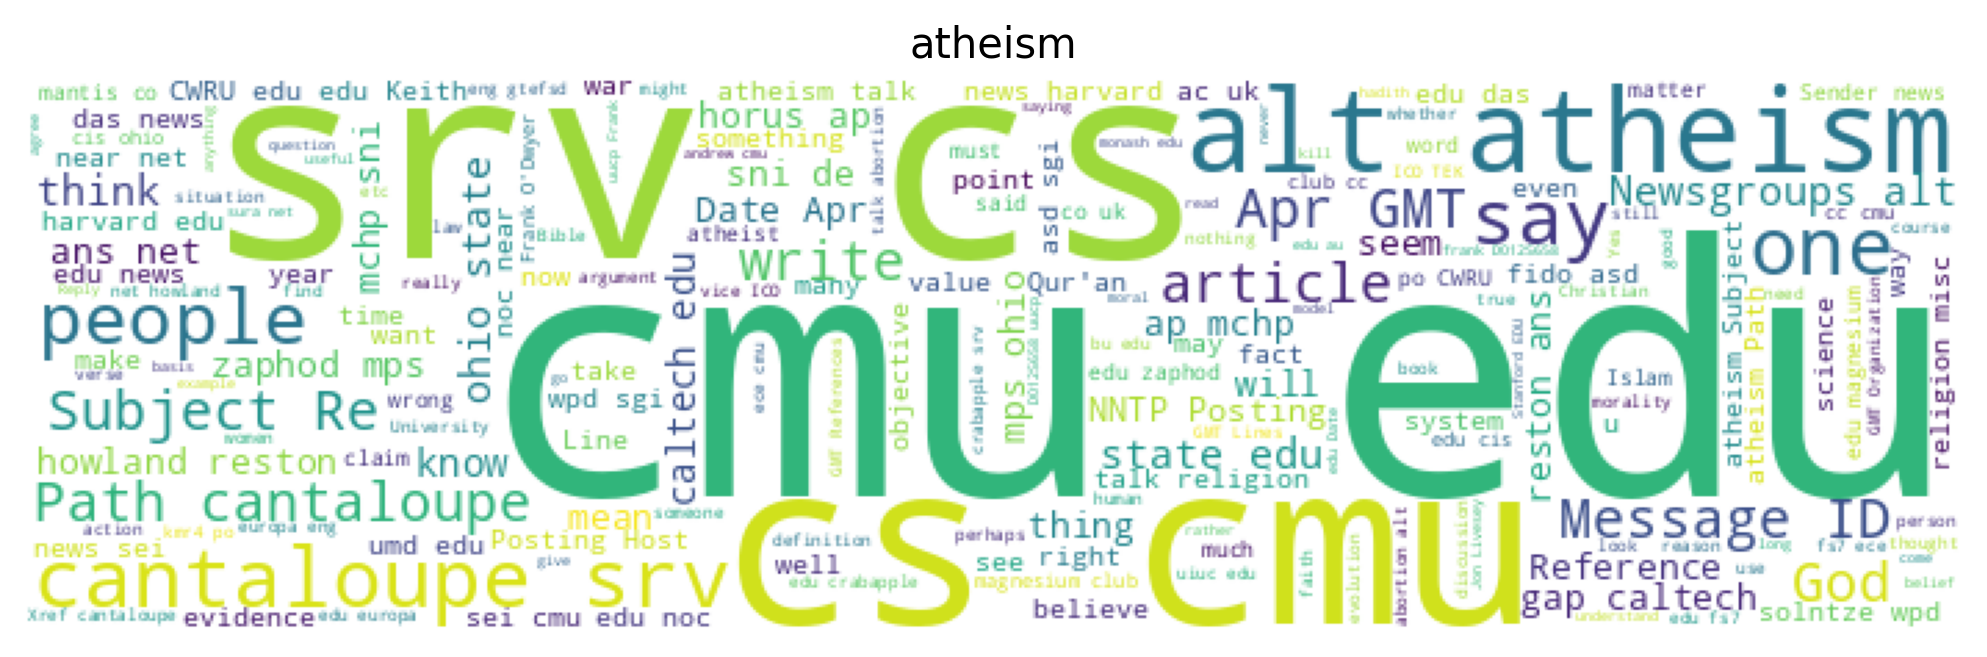

In [36]:
# word cloud for atheism
cloud(atheism, 'atheism')

In [ ]:
# this are the most frequent in atheism types of blogs

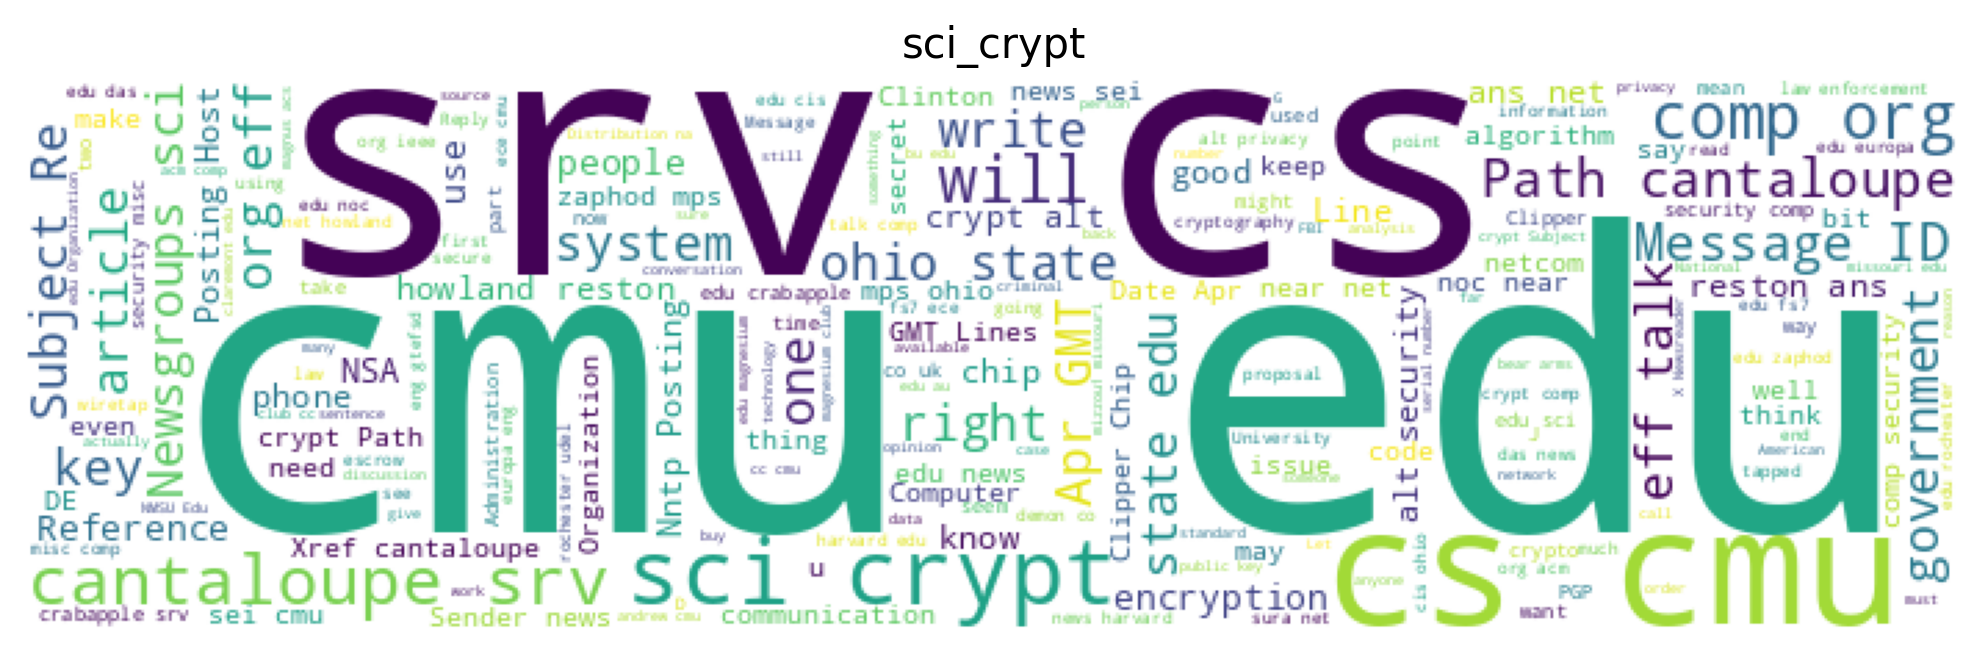

In [38]:
# word cloud for baseball
cloud(sci_crypt, 'sci_crypt')

In [ ]:
# this are the most frequent in # this are the most frequent in baseball  types of blogs types of blogs

# TEXT CLEANING
1. remove unwanted charaters
2. text normalization
3. tokenization
4. lemmatization
5. join the text

In [39]:
# downloading dependancies
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [40]:
len(df)

2000

In [43]:
# object for this class
lemma = WordNetLemmatizer()

In [45]:
# applying for loop to cleaning and preprocessing of text
corpus = []
for i in range(len(df)):
  blog = re.sub('[^a-zA-Z]', ' ', df['Data'][i])
  blog = blog.lower()
  blog = blog.split()
  blog = [lemma.lemmatize(i) for i in blog if i not in stopwords.words('english')]
  blog = ' '.join(blog)
  corpus.append(blog)

In [46]:
corpus

['path cantaloupe srv c cmu edu magnesium club cc cmu edu news sei cmu edu ci ohio state edu zaphod mp ohio state edu howland reston an net agate doc ic ac uk uknet mcsun germany eu net thoth mchp sni de horus ap mchp sni de frank frank uucp frank dwyer newsgroups alt atheism subject islamic genocide date apr gmt organization siemens nixdorf ag line distribution world message id r vej k horus ap mchp sni de reference r qe fido asd sgi com r ubl bd horus ap mchp sni de r ek uo fido asd sgi com nntp posting host ap mchp sni de article r ek uo fido asd sgi com livesey solntze wpd sgi com jon livesey writes article r ubl bd horus ap mchp sni de frank uucp frank dwyer writes article r qe fido asd sgi com livesey solntze wpd sgi com jon livesey writes noting particular society case mainland uk religously motivated murder murder kind say little whether inter religion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates

In [47]:
len(corpus)

2000

# FEATURE EXTRACTION

In [ ]:
# FEATURE EXTRACTION

# TF-IDF

In [48]:
df.head(1)

Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,\n#|> #has few religously motivated murders, and few murders of *any*\n#|> #kind, says very little about whether inter-religion murders elsewhere\n#|> #are religiously motivated.\n#|> \n#|> No, but it allows one to conclude that there is nothing inherent\n#|> in all religion (or for that matter, in catholicism and protestantism)\n#|> that motivates one to kill.\n#\n#"Motivates" or "allows?"    The Christian Bible says that one may kill\n#under certain circumstances.   In fact, it instructs one to kill under\n#certain circumstances.     \n\nI'd say the majority of people have a moral system that instructs them\nto kill under certain circumstances.  I do get your distinction between\nmotivate and allow, and I do agree that if a flavour of theism 'allows'\natoricities, then that's an indictment of that theism.  But it rather\ndepends on what the 'certain circumstances' are.  When you talk about\nChristianity, or Islam, then at least your claims can be understood.\nIt's when people go to a general statement about theism that it falls\napart.  One could believe in a God which instructs one to be utterly\nharmless.\n#\n#|> For my part, I conclude that something\n#|> else is required.  I also happen to believe that that something\n#|> else will work no less well without religion - any easy Them/Us will\n#|> do.\n#\n#And what does religion supply, if not an easy Them/Us?\n\nNot necessarily.  "Love thy neighbour" does not supply a them/us - it\ndemolishes it.  And my definition of religion is broader than my\ndefinition of theism, as I have explained.\n#\n#|> #By insisting that even the murder of four labourers, chosen because\n#|> #they were catholics, and who had nothing to do with the IRA, by \n#|> #Protestant extremists, is *not* religously motivated, I think what \n#|> #you are saying is that you simply will not accept *any* murder as \n#|> #being religiously motivated.\n#|> \n#|> No.  What about that guy who cut off someone's head because he believed \n#|> he was the devil incarnate?  That was religously motivated.\n#\n#What about the Protestant extremists who killed four Catholic \n#labourers?     That *wasn't* religiously motivated?\n\nNot in my opinion.  If they were doing it because of some obscure\npoint of theology, then yes.  But since all protestants don't do this\n(nor do they elect extremists to do it for them), it's just too broad\ntoo say "religion did this".  I'm saying that the causes are far more\ncomplex than that - take away the religious element, and you'd still\nhave the powerful motives of revenge and misguided patriotism.  You\nknow, when most Catholics and Protestants worldwide say 'stop the \nkilling', one might listen to that, especially when you claim not\nto read minds.\n#\n#\n#|> Also, the murders ensuing from the fatwa on Mr. Rushdie, the Inquisitions,\n#|> and the many religous wars.\n#\n#What's so special about these exceptions?    Isn't this all just a\n#grab-bag of ad-hoc excuses for not considering some other

In [50]:
y = df['encoded_label)']
y.head()

,encoded_label)
0,0
1,0
2,0
3,0
4,0


In [51]:
#  object for the tfidf class
tf = TfidfVectorizer()
x_data = tf.fit_transform(corpus)
x_data

<2000x34494 sparse matrix of type '<class 'numpy.float64'>'
	with 287565 stored elements in Compressed Sparse Row format>

In [53]:
# this is not showing output because it has created metrix in the backen
# to display the values it has calculated I need to convert it into array format

x_data = x_data.toarray()
x_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
# splitting data into training and testing part
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y, test_size=0.20, random_state=42)

In [55]:
xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
ytrain.head()

,encoded_label)
968,9
240,2
819,8
692,6
420,4


# MODEL BUILDING

In [61]:
# NAIVE BAYES ALGORITHM
nb = MultinomialNB()
nb.fit(xtrain, ytrain)
ypred = nb.predict(xtest)
ypred

array([18,  3, 13,  9,  3, 12,  9, 17,  0, 13,  0, 13, 11,  9,  3,  2,  7,
        1, 16, 18,  6, 18, 19, 10,  0, 11, 11,  9,  7,  0,  6, 10,  2, 10,
       10,  4, 13, 10, 10,  2,  3, 19,  2,  4, 15,  8,  2,  8,  0, 16, 15,
       11, 14,  2,  9, 17, 12, 16, 11,  3, 14,  6, 16, 10, 18, 18,  9, 15,
        1, 14, 14,  3, 13, 10,  7,  3, 18,  7, 12, 18,  0,  8, 14, 15, 18,
       10, 17,  4,  2, 11, 15, 17,  2,  2, 18, 18,  4, 12, 15, 18,  9,  9,
        4, 13,  2,  8,  7,  2,  6, 11,  7, 14, 10, 17,  7,  3, 11,  9,  3,
       18, 18, 10, 11,  4,  3, 15,  4,  8, 11,  3, 19, 18,  7,  5,  8, 12,
        0,  0, 16, 15, 13,  3, 18,  8, 15,  5,  6,  4,  2,  1, 16,  9,  6,
       11,  3,  1,  2, 16,  3, 16,  6, 16,  1, 11, 19, 14, 17, 12,  2, 17,
       11,  6,  0, 18,  4, 13, 12, 13,  8, 16, 12,  7, 18, 11,  8,  7,  0,
       16, 11, 12,  7,  2, 13,  2, 19,  4, 11,  8,  6, 15, 10, 12,  1,  7,
       11,  2, 14,  9, 10,  0, 17,  0,  2,  1,  7, 18, 11,  3,  1, 12,  9,
        1,  5, 11, 18, 19

In [ ]:
# these are the labels, for each input it has predicted label.
# like which blog belongs to which perticular category

# EVALUATION OF THE MODEL

In [62]:
# model evaluation
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.58      0.83      0.68        18
           1       0.82      0.78      0.80        18
           2       0.70      0.95      0.81        22
           3       0.73      0.88      0.80        25
           4       0.81      0.62      0.70        21
           5       1.00      0.24      0.39        25
           6       0.88      0.78      0.82        18
           7       0.81      0.94      0.87        18
           8       0.88      0.88      0.88        16
           9       0.89      0.89      0.89        18
          10       0.68      1.00      0.81        15
          11       0.68      1.00      0.81        19
          12       0.79      0.69      0.73        16
          13       0.88      0.88      0.88        17
          14       1.00      0.90      0.95        21
          15       1.00      1.00      1.00        23
          16       0.91      0.75      0.82        28
          17       0.95    

In [ ]:
# we can anlize the performance of the model on the basis of precision, recall, f1-score, support, accuracy printed above

# HYPERPARAMETER TUNNING

In [64]:
from sklearn.model_selection import GridSearchCV

In [66]:
# Defining the parameter grid to search for the best parameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False]
}


In [67]:
# Creatin a object for GridSearchCV class

grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5, scoring='accuracy')

In [68]:
# Fitting the grid search to the training data

grid_search.fit(xtrain, ytrain)


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [69]:
# Getting the best hyperparameters and the best score

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [70]:
# Printing the best parameters it has found out

print("Best Hyperparameters:", best_params)

print("Best Score:", best_score)

Best Hyperparameters: {'alpha': 2.0, 'fit_prior': False}
Best Score: 0.8318749999999999


In [71]:
# asking for the best model and building a model with the best parameters
# Evaluatuing the model with the best hyperparameters on the test data

best_model = grid_search.best_estimator_
ypred_tuned = best_model.predict(xtest)
print(classification_report(ytest, ypred_tuned))

              precision    recall  f1-score   support

           0       0.60      0.83      0.70        18
           1       0.78      0.78      0.78        18
           2       0.70      0.95      0.81        22
           3       0.71      1.00      0.83        25
           4       0.80      0.57      0.67        21
           5       1.00      0.28      0.44        25
           6       0.88      0.78      0.82        18
           7       0.81      0.94      0.87        18
           8       0.93      0.88      0.90        16
           9       0.89      0.94      0.92        18
          10       0.71      1.00      0.83        15
          11       0.76      1.00      0.86        19
          12       0.91      0.62      0.74        16
          13       0.88      0.88      0.88        17
          14       1.00      0.90      0.95        21
          15       0.96      1.00      0.98        23
          16       0.92      0.86      0.89        28
          17       0.95    

In [ ]:
# accuracy of the model increased a bit from 79% to 81% after hyperparameter tunning